#### Team Members: Vincent Chou and Caroline Nelson

# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Mon, November 14</p>



Your homework should be written in a **Jupyter notebook**. Please submit **only one** ipynb file from each group, and include the names of all the group members. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Problem 1 - MNIST (15 pts)
In this question you classify hand-written digits. We want to use MNIST data set and try Multi-layer Perceptron (MLP) classifier using sklearn package in Python. In order to simplify the problem, we classify digits into 8 classes (digits 0,1,2,...7) and ignore records for digits 8 and 9.  Use the code below to access the data set and extract data with labels 0 to 7, and split the data set into train set and test set.

1. Fit a Multilayer Perceptron Classifier using the standard options on sklearn's MLP on train data. Report the root MSE for both train and test data. (5 pts)

    Use these parameters for your model: 
                    {hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=42,
                    learning_rate_init=.1}
                    
2. To find better parameters for the MLP Classifier model, try an exhaustive search over all parameters of the data. Use sklearn's GridSearchCV to find the best subset of parameters from the set:
                    { alpha = [0.1,0.01,0.001], activation : ['logistic', 'relu'] }
    which parameters resulted in a more accurate model? Can you explain why? (5 pts)

3. Select 5 misclassified images and display them. (5 pts)

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X = (mnist.data / 255.)[:48200]
y = mnist.target[:48200]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=42)

#### Part 1

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,solver='sgd', verbose=10, tol=1e-4, random_state=42,learning_rate_init=.1)

mlp.fit(X_train, y_train)

y_hat_test = mlp.predict(X_test)
y_hat_train = mlp.predict(X_train)

 Iteration 1, loss = 0.24522635
Iteration 2, loss = 0.10589741
Iteration 3, loss = 0.07488529
Iteration 4, loss = 0.05895084
Iteration 5, loss = 0.04782934
Iteration 6, loss = 0.03945315
Iteration 7, loss = 0.03320940
Iteration 8, loss = 0.02872414
Iteration 9, loss = 0.02451143
Iteration 10, loss = 0.02132893


In [34]:
import numpy as np
print "Train RMSE: ", np.sqrt(np.mean((y_train-y_hat_train)**2))
print "Test RMSE: ", np.sqrt(np.mean((y_test-y_hat_test)**2))

Train RMSE:  0.216056700718
Test RMSE:  0.466958020095


In [23]:
import pandas as pd
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred) 
df_confusion

Predicted,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Actual,,,,,,,,
0.0,576,0,0,2,0,5,0,1
1.0,0,639,4,3,0,1,0,2
2.0,0,1,579,4,1,0,1,4
3.0,1,0,4,600,2,8,0,3
4.0,2,0,3,1,606,0,0,8
5.0,2,0,1,9,0,534,4,0
6.0,2,0,0,0,1,5,597,0
7.0,0,2,5,2,1,0,0,594


In [24]:
print "Train Accuracy: ", mlp.score(X_train, y_train)
print "Test Accuracy: ", mlp.score(X_test, y_test) 

Train Accuracy:  0.995620101429
Test Accuracy:  0.980290456432


#### Part 2

In [25]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
parameters = { 'alpha': [0.1,0.01,0.001], 'activation' : ['logistic', 'relu'] }

gridsearch = GridSearchCV(MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, solver='sgd', verbose=10, tol=1e-4, random_state=42,learning_rate_init=.1), parameters)

In [26]:
gridsearch.fit(X_train, y_train)

Iteration 1, loss = 0.63780467
Iteration 2, loss = 0.26993412
Iteration 3, loss = 0.24531053
Iteration 4, loss = 0.23249797
Iteration 5, loss = 0.22329679
Iteration 6, loss = 0.21626242
Iteration 7, loss = 0.21060256
Iteration 8, loss = 0.20636226
Iteration 9, loss = 0.20275525
Iteration 10, loss = 0.19956171
Iteration 1, loss = 0.63829233
Iteration 2, loss = 0.27025643
Iteration 3, loss = 0.24654183
Iteration 4, loss = 0.23410992
Iteration 5, loss = 0.22552123
Iteration 6, loss = 0.21804481
Iteration 7, loss = 0.21292405
Iteration 8, loss = 0.20858724
Iteration 9, loss = 0.20470124
Iteration 10, loss = 0.20241500
Iteration 1, loss = 0.63081829
Iteration 2, loss = 0.26626237
Iteration 3, loss = 0.24312374
Iteration 4, loss = 0.22986850
Iteration 5, loss = 0.22091677
Iteration 6, loss = 0.21371822
Iteration 7, loss = 0.20887361
Iteration 8, loss = 0.20509427
Iteration 9, loss = 0.20130855
Iteration 10, loss = 0.19839854
Iteration 1, loss = 0.60657526
Iteration 2, loss = 0.22005063
Itera

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.001], 'activation': ['logistic', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
print gridsearch.best_params_
print gridsearch.best_score_

{'alpha': 0.01, 'activation': 'relu'}
0.976947902259


The 'relu' activation function is differentiable everywhere, except zero.  In addition, the gradient does not vanish as we increase x like it would with a logistic or sigmoid activation function.

#### Part 3

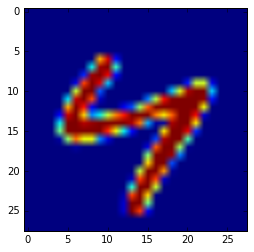

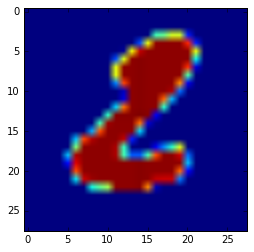

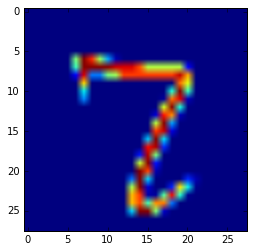

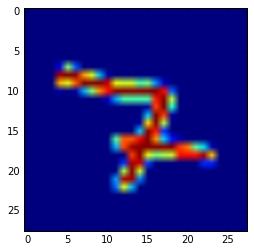

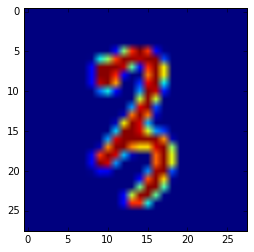

In [69]:
%matplotlib inline 
storage = []
for i in range(0, len(y_hat)):
    if y_hat[i] != y_test[i]:
        storage.append(i)

for i in range(5,10):
    fig, ax1 = plt.subplots()
    plt.imshow(X_test[storage[i]].reshape((28,28)))

# Question 2: Regression Trees (10 points)

In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. You will be using the same Hitters.csv dataset (available on Canvas) used in HW2 Q5 to predict a baseball player’s Salary using all the 16 performance variables. Use a random state of 42 and a test size of 1/3 to split the data into training and test.

1. Build a regression using [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) with max_depth = 5. Report the mean squared errors on both training and test datasets. (4)
2. Repeat Part-1 with max_depth = 2. (4)
3. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 5 and 2? Which tree is better and why? (2)

In [36]:
import pandas as pd
Hitters=pd.read_csv('Hitters.csv')
X = Hitters.drop(['Salary'],axis=1)
target = Hitters['Salary']

X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=1.0/3, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [38]:
import numpy as np
pred_tree_test= tree.predict(X_test)
actual_tree_test= Y_test
MSE_tree_test = np.mean((actual_tree_test-pred_tree_test)**2)
print "Test MSE, depth of 5: ", MSE_tree_test

Test MSE, depth of 5:  211910.669905


In [39]:
pred_tree_train= tree.predict(X_train)
actual_tree_train= Y_train
MSE_tree_train = np.mean((actual_tree_train-pred_tree_train)**2)
print "Train MSE, depth of 5: ", MSE_tree_train

Train MSE, depth of 5:  18749.4789728


In [40]:
tree2=DecisionTreeRegressor(max_depth=2)
tree2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [42]:
pred_tree_test2= tree2.predict(X_test)
actual_tree_test2= Y_test
MSE_tree_test2 = np.mean((actual_tree_test2-pred_tree_test2)**2)
print "Train MSE, depth of 2: ", MSE_tree_test2

Train MSE, depth of 2:  166165.705731


In [43]:
pred_tree_train2= tree2.predict(X_train)
actual_tree_train2= Y_train
MSE_tree_train2 = np.mean((actual_tree_train2-pred_tree_train2)**2)
print "Test MSE, depth of 2: ", MSE_tree_train2

Test MSE, depth of 2:  69909.5877084


We see the tree with a depth of 5 has a lower training error, and a higher test error.  The simpler tree (depth of 2) would be the best to use since it does not overfit the data.

# Question 3 - Support Vector Regression vs. Linear Regression (10pts)
Download datasets 'summer_gpa_test.csv' and 'summer_gpa_train.csv' from Canvas. With this toy dataset, we want to predict GPA in Summer 2016 for students using 5 different features. So, target variable will be 'GPA_summer2016' in this problem.

1. Fit a support vector regression using the default options on [sklearn's SVR](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on training data. Note that the default kernel is "rbf".  Report the root MSE for both train and test data. (2)

2. Fit SVR with 'linear' kernel and Linear Regression (for other options, use default parameter settings). Report RMSE of prediction on train and test data for the two methods. (3)

3. Now, compare the results of three different methods, then provide a possible reason for SVR with RBF kernel not working well on test set. (1)

4.  Provide simple residual plots on Train and Test set for all three methods. Specifically, submit a scatter plot wherein y-axis shows the residuals and x-axis the predicted values. What can you learn about the effect of outliers on different models from this problem? (4)

#### Part 1

In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

d_train = pd.read_csv('summer_gpa_train.csv',index_col='student')
d_test = pd.read_csv('summer_gpa_test.csv',index_col='student')

y_train = d_train['GPA_summer2016']
y_test = d_test['GPA_summer2016']
x_train = d_train.drop('GPA_summer2016',axis=1)
x_test = d_test.drop('GPA_summer2016',axis=1)

In [45]:
SVR_rbf = SVR()
SVR_rbf.fit(x_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [56]:
pred_svr_train= SVR_rbf.predict(x_train)
actual_svr_train= y_train
MSE_svr_train = np.mean((actual_svr_train-pred_svr_train)**2)
print "Train RMSE, SVR-RBF: ", np.sqrt(MSE_svr_train)
pred_svr_test= SVR_rbf.predict(x_test)
actual_svr_test= y_test
MSE_svr_test = np.mean((actual_svr_test-pred_svr_test)**2)
print "Test RMSE, SVR-RBF: ", np.sqrt(MSE_svr_test)

Train RMSE, SVR-RBF:  0.174703118961
Test RMSE, SVR-RBF:  0.549667753896


#### Part 2

In [57]:
linear= LinearRegression()
SVR_linear=SVR(kernel='linear')

In [58]:
linear_reg=linear.fit(x_train, y_train)
linear_svr=SVR_linear.fit(x_train, y_train)

In [59]:
pred_linear_train= linear_reg.predict(x_train)
actual_linear_train= y_train
MSE_linear_train = np.mean((actual_linear_train-pred_linear_train)**2)
print "Train RMSE, Linear Regression: ", np.sqrt(MSE_linear_train)

pred_linear_test= linear_reg.predict(x_test)
actual_linear_test= y_test
MSE_linear_test = np.mean((actual_linear_test-pred_linear_test)**2)
print "Test RMSE, Linear Regression: ", np.sqrt(MSE_linear_test)

Train RMSE, Linear Regression:  0.458060629343
Test RMSE, Linear Regression:  0.260057137391


In [60]:
pred_linsvr_train= linear_svr.predict(x_train)
actual_linsvr_train= y_train
MSE_linsvr_train = np.mean((actual_linsvr_train-pred_linsvr_train)**2)
print "Train RMSE, SVR-linear: ", np.sqrt(MSE_linsvr_train)

pred_linsvr_test= linear_svr.predict(x_test)
actual_linsvr_test= y_test
MSE_linsvr_test = np.mean((actual_linsvr_test-pred_linsvr_test)**2)
print "Test RMSE, SVR-linear: ", np.sqrt(MSE_linsvr_test)

Train RMSE, SVR-linear:  0.477967720085
Test RMSE, SVR-linear:  0.231968041522


#### Part 3

RBF kernel doesn't work well on the test set because it overfit the data.  A simpler kernel or model (exhibited by parts 1 and 2) would work better in this case; their RMSE's were significantly lower for the test set than the training set.

#### Part 4: Residual Plots

Populating the interactive namespace from numpy and matplotlib


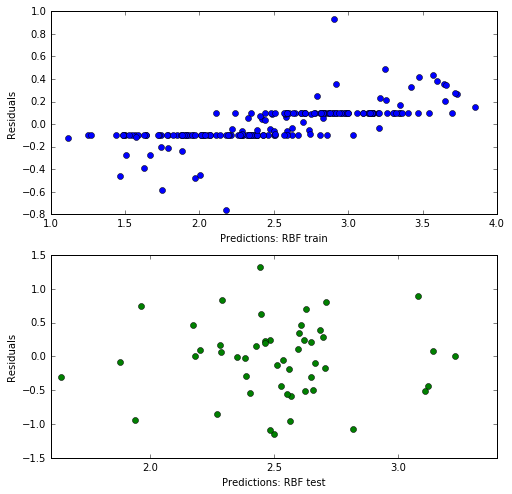

In [79]:
import matplotlib.pyplot as plt
%pylab inline

fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           figsize=(8, 8))

ax1.plot(pred_svr_train, actual_svr_train-pred_svr_train, marker='o', color='blue', linestyle='None')
ax1.set_xlabel('Predictions: RBF train')
ax1.set_ylabel('Residuals')

ax2.plot(pred_svr_test, actual_svr_test-pred_svr_test, marker='o', color='green', linestyle='None')
ax2.set_xlabel('Predictions: RBF test')
ax2.set_ylabel('Residuals')



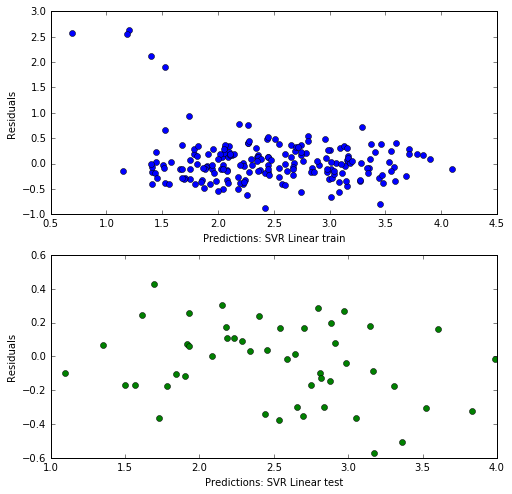

In [78]:
fig, (ax3, ax4) = subplots(nrows=2,
                           ncols=1,
                           figsize=(8, 8))
ax3.plot(pred_linsvr_train, actual_linsvr_train-pred_linsvr_train, marker='o', color='blue', linestyle='None')
ax3.set_xlabel('Predictions: SVR Linear train')
ax3.set_ylabel('Residuals')

ax4.plot(pred_linsvr_test, actual_linsvr_test-pred_linsvr_test, marker='o', color='green', linestyle='None')
ax4.set_xlabel('Predictions: SVR Linear test')
ax4.set_ylabel('Residuals')



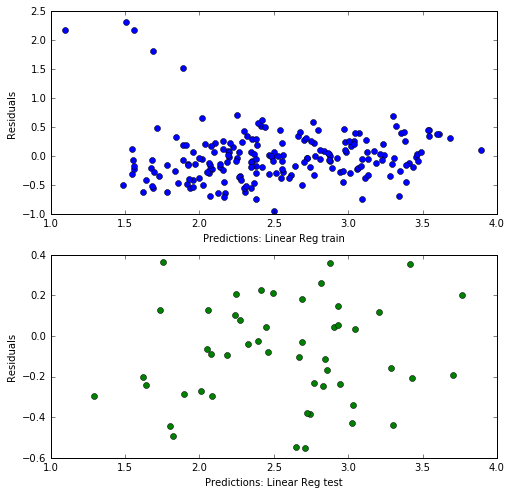

In [80]:
fig, (ax5, ax6) = subplots(nrows=2,
                           ncols=1,
                           figsize=(8, 8))

ax5.plot(pred_linear_train, actual_linear_train-pred_linear_train, marker='o', color='blue', linestyle='None')
ax5.set_xlabel('Predictions: Linear Reg train')
ax5.set_ylabel('Residuals')

ax6.plot(pred_linear_test, actual_linear_test-pred_linear_test, marker='o', color='green', linestyle='None')
ax6.set_xlabel('Predictions: Linear Reg test')
ax6.set_ylabel('Residuals')


The linear regression and linear SVR models trained the data well in handling outliers.  It appears that the RBF kernel overfit the training set, and for that reason, did not handle outliers well in the test set.  (The residuals of the RBF kernel model were not normally distributed either.)

# Question 4: Bayesian Networks (10 pts)
#### Part (a) (5 points)
Consider the following Bayesian network of binary (True/False) variables.

<img src="hw4q4pic1.png">

This is equivalent to saying that X and Y are conditionally independent given C, or P(X,Y|C) = P(X|C)P(Y|C). This happens to be the assumption used by the Naive Bayes classifier.

The exact probabilities are given:  
P(X = True | C = True) = .75  
P(X = True | C = False) = .5  
P(Y = True | C = True) = .25  
P(Y = True | C = False) = .5  
P(C = True) = .5

Find P(C = True | X = True, Y = True). The easiest method is to use Bayes rule, along with the conditional independence equation given above.

#### (b) (5 points)
A new feature Z is added, and based on prior knowledge, we believe that one of the two networks given below properly captures the dependencies among the variables. Our goal is to determine P(C|X,Y,Z). For each of these two different networks:

<img src="hw4q4pic2.png">

will P(C|X,Y,Z) be the same as P(C|X,Y) (the inference from part a)? Or will it be different? Give a separate answer for each network.

#### Part A

$P(C|X,Y) = \frac{P(X,Y|C)P(C)}{P(X,Y)}$

$P(C|X,Y) = \frac{P(X,Y|C)(0.5)}{P(X,Y)}$ 

$P(X,Y|C) = P(X|C)P(Y|C)$ 

$P(C|X,Y) = \frac{(0.75)(0.25)(0.5)}{P(X,Y)}$  

$P(X,Y) = P(X,Y|C)P(C) + P(X,Y|!C)P(!C)$ 

$P(X,Y) = .75*.25*.5+.5.5*.5$ 

$P(X,Y) = .21875$ 

$P(C|X,Y) = \frac{(0.75)(0.25)(0.5)}{.21875}$ 

$P(C|X,Y) = .429$



#### Part B

$P(C|X,Y,Z) = \frac{P(C)P(X|C)P(Y|C)P(Z|X,Y)}{P(X)P(Y)P(Z|X,Y)}$

$P(C|X,Y,Z) = \frac{P(C)P(X|C)P(Y|C)}{P(X)P(Y)}$

$P(C|X,Y,Z) = \frac{P(C)P(X,Y|C)}{P(X,Y)}$

The first network P(C|X,Y,Z) equals P(C|X,Y).


$P(C|X,Y,Z) = \frac{P(C)P(X|C)P(Y|C,Z)P(Z|X)}{P(X)P(Y|Z)P(Z|X)}$

This depends on Z being true. Since it does it cannot be equal to P(C|X,Y), the second network P(C|X,Y,Z) does not equal P(C|X,Y).


# Question 5: Multiclass Classification (5 points)

One way of using a binary classifier for addressing a multiclass classification problem is to use a One-vs.-All (or One-vs.-Rest)  strategy.

1. Briefly describe the  One-vs.-All method.  (2pts)

2. What are two disadvantages of using the One-vs.-All method in situations where the number of classes $N$ is very large? (3pts)

#### Answer
1. In a multiclass classification problem, one vs all is creating your boundaries between one class and the rest of the dataset. Essentially you have two classes, positive and negative, where the positive class is the class of interest and the negative is everything else. You create classification boundaries between the positive and negative classes for each unique class. 

2. As N increases, the binary classifiers become more and more unbalanced with respect to the size of each class, and would need to be more training data for each classifier to be efficient.  Also, as N increases, it becomes increasingly difficult to classify in certain regions (often close to the boundaries) where some end up being classified as multiple classes. 